<a href="https://colab.research.google.com/github/mohanrajmit/DL-Training/blob/master/Animals_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import to_categorical

np.random.seed(35)

In [19]:
!git clone https://github.com/mohanrajmit/Image-Read.git

fatal: destination path 'Image-Read' already exists and is not an empty directory.


In [20]:
from imutils import paths
import cv2

In [21]:
def load(imagePaths):
  # initialize the list of features and labels
  data = []
  labels = []

  # loop over the input images
  for (i, imagePath) in enumerate(imagePaths):
    # load the image and extract the class label assuming
    # that our path has the following format:
    # /path/to/dataset/{class}/{image}.jpg
    image = cv2.imread(imagePath)
    label = imagePath.split("/")[-2]
    if label == "cats":
      labels.append(0)
    elif label =="dogs":
      labels.append(1)
    else:
      labels.append(2)
    #label = imagePath.split(os.path.sep)[-2]
    image = cv2.resize(image, (32, 32),interpolation=cv2.INTER_AREA)

    # treat our processed image as a "feature vector"
    # by updating the data list followed by the labels
    data.append(image)
    #labels.append(label)

    # show an update every `verbose` images
    #if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
    #print("[INFO] processed {}/{}".format(i + 1,
    #len(imagePaths)))

    # return a tuple of the data and labels
  return (np.array(data), np.array(labels))

In [22]:
imagePaths = list(paths.list_images("/content/Image-Read/animals"))
print(imagePaths)


['/content/Image-Read/animals/panda/panda_00146.jpg', '/content/Image-Read/animals/panda/panda_00760.jpg', '/content/Image-Read/animals/panda/panda_00970.jpg', '/content/Image-Read/animals/panda/panda_00781.jpg', '/content/Image-Read/animals/panda/panda_00890.jpg', '/content/Image-Read/animals/panda/panda_00137.jpg', '/content/Image-Read/animals/panda/panda_00450.jpg', '/content/Image-Read/animals/panda/panda_00823.jpg', '/content/Image-Read/animals/panda/panda_00616.jpg', '/content/Image-Read/animals/panda/panda_00040.jpg', '/content/Image-Read/animals/panda/panda_00304.jpg', '/content/Image-Read/animals/panda/panda_00470.jpg', '/content/Image-Read/animals/panda/panda_00548.jpg', '/content/Image-Read/animals/panda/panda_00087.jpg', '/content/Image-Read/animals/panda/panda_00640.jpg', '/content/Image-Read/animals/panda/panda_00937.jpg', '/content/Image-Read/animals/panda/panda_00576.jpg', '/content/Image-Read/animals/panda/panda_00165.jpg', '/content/Image-Read/animals/panda/panda_0097

In [23]:
print(len(imagePaths))

3000


In [24]:
(data, labels) = load(imagePaths)



In [25]:
print(data.shape)

(3000, 32, 32, 3)


In [26]:
print(labels.shape)

(3000,)


In [27]:
#data = data.reshape((3000, 3072))

In [28]:


data = data.astype('float32')


data/=255


In [37]:
data.shape

(3000, 32, 32, 3)

In [29]:
number_of_classes = 3

Y_train = to_categorical(labels, number_of_classes)
Y_train[10]

array([0., 0., 1.], dtype=float32)

In [30]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [31]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32,32,3),padding='same', activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(3,activation='softmax'))


In [32]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                 

In [34]:
hist = model.fit(data, Y_train, batch_size=128, epochs=100)

Epoch 1/100
24/24 [==============================] - 12s 20ms/step - loss: 0.9397 - accuracy: 0.5083
Epoch 2/100
24/24 [==============================] - 0s 10ms/step - loss: 0.7535 - accuracy: 0.6093
Epoch 3/100
24/24 [==============================] - 0s 10ms/step - loss: 0.7253 - accuracy: 0.6353
Epoch 4/100
24/24 [==============================] - 0s 9ms/step - loss: 0.6747 - accuracy: 0.6760
Epoch 5/100
24/24 [==============================] - 0s 9ms/step - loss: 0.6561 - accuracy: 0.6787
Epoch 6/100
24/24 [==============================] - 0s 9ms/step - loss: 0.6008 - accuracy: 0.7103
Epoch 7/100
24/24 [==============================] - 0s 10ms/step - loss: 0.5486 - accuracy: 0.7417
Epoch 8/100
24/24 [==============================] - 0s 9ms/step - loss: 0.5587 - accuracy: 0.7493
Epoch 9/100
24/24 [==============================] - 0s 9ms/step - loss: 0.5056 - accuracy: 0.7673
Epoch 10/100
24/24 [==============================] - 0s 9ms/step - loss: 0.4653 - accuracy: 0.7910
Epoc

In [36]:
label_name=["cats","dogs","panda"]

1/1 [==============================] - 0s 34ms/step
[[0. 1. 0.]]


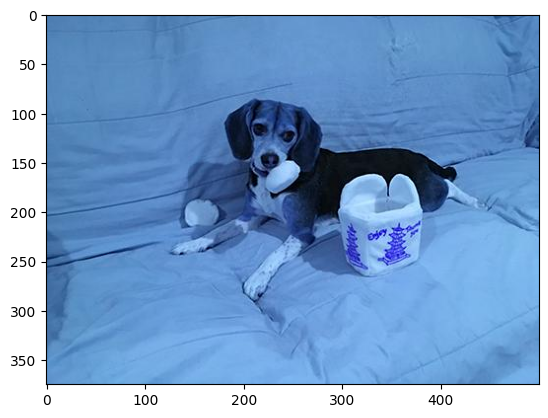

In [40]:
img=cv2.imread("/content/image_0_62.jpg")
img2=cv2.resize(img, (32, 32),interpolation=cv2.INTER_AREA)
#img1=img2.flatten()
#img1=img1.reshape(-1,1)
# insert a new axis along the row
b = np.expand_dims(img2, axis=0)
res=model.predict(b)
print(res)
#print(label_name[int(res)])

plt.imshow(img)